In [101]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [78]:
# Reading Data
dataset=pd.read_csv('C:/Users/ISHITA GUPTA/Downloads//diabetes.csv')

In [79]:
## Printing Rows and Columns
print(dataset.shape)

(768, 9)


In [80]:
## Printing Statistical Details
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [81]:
## First Few Observations
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
# Data Cleaning 
print(dataset.isnull().values.any().sum())
print(dataset.isnull().sum())
dataset=dataset[~(dataset[dataset.columns[1:-1]]==0).any(axis=1)]
print(dataset.shape)

0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
(392, 9)


In [84]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


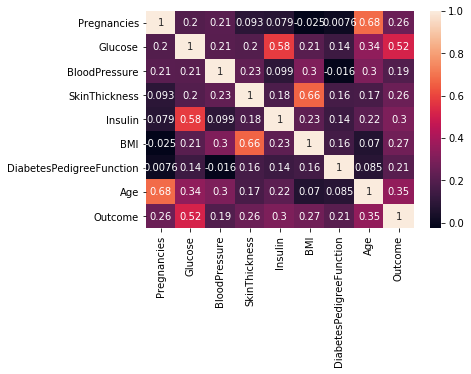

In [86]:
# Heatmap
corrmat=dataset.corr().T
corr_features=corrmat.index
g=seabornInstance.heatmap(dataset[corr_features].corr(),annot=True)

In [87]:
# Correlation
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


In [88]:
Outcome_map = {True:1,False:0}
dataset['Outcome'] = dataset['Outcome'].map(Outcome_map)
Outcome_true = len(dataset.loc[dataset['Outcome'] == True])
Outcome_false = len(dataset.loc[dataset['Outcome'] ==False])
(Outcome_true,Outcome_false)

(130, 262)

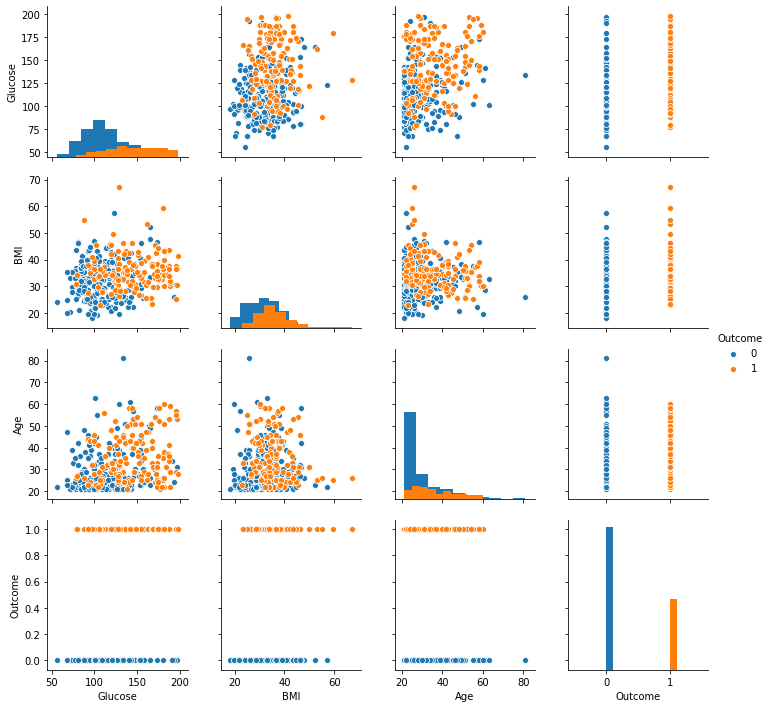

In [52]:
seabornInstance.pairplot(dataset,hue='Outcome',diag_kind='hist');

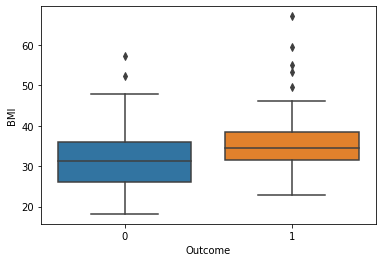

In [89]:
seabornInstance.boxplot(x='Outcome',y='BMI',data=dataset);

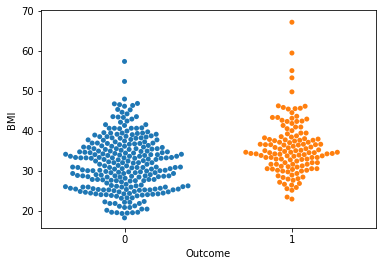

In [90]:
seabornInstance.swarmplot(x='Outcome',y='BMI',data=dataset);

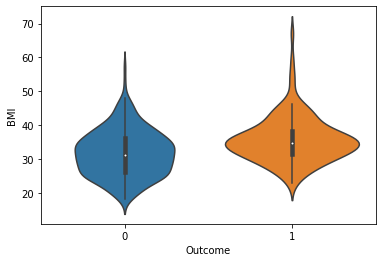

In [91]:
seabornInstance.violinplot(x='Outcome',y='BMI',data=dataset);

In [92]:
# Logistic Regression
## Storing Dependent and Independent parameters
X, Y=dataset.values[:,:-1],dataset.values[:,-1]

In [93]:
## Data Splicing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.02,random_state=42,stratify=Y)

In [94]:
## Fitting model into Training Data
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\ISHITA GUPTA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
## Accuracy
accuracy=model.score(X_test,Y_test)
print(accuracy*100)

87.5


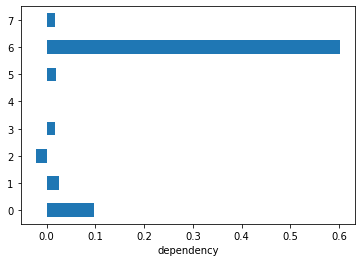

In [99]:
# Interpreting
c=list(model.coef_[0])
labels=dataset.columns[:-1]
parameters=pd.DataFrame()
parameters["parameters"]=labels
parameters["dependency"]=c
parameters.dependency.plot(kind="barh")
plt.xlabel('dependency');

In [100]:
parameters

,parameters,dependency
0,Pregnancies,0.096503
1,Glucose,0.025702
2,BloodPressure,-0.022323
3,SkinThickness,0.017229
4,Insulin,0.000665
5,BMI,0.018836
6,DiabetesPedigreeFunction,0.601975
7,Age,0.017422


In [102]:
# Naive Bayes
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [103]:
# Accuracy on training data
gnb.score(X_train,Y_train)

0.78125

In [104]:
# Accuracy on testing data
gnb.score(X_test,Y_test)

0.625